## Problem-1

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # will not show deprecation warning
def warn(*args, **kwargs):
    pass
warnings.warn = warn  # avoid other warnings

import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### 1. Loading the Data

Load the data in X.npy. How many cells and genes are in this data set?

In [2]:

Xpath = 'data/p1/X.npy'
yPath = 'data/p1/y.npy'
X = np.load(Xpath)
y = np.load(yPath)
X.shape, y.shape

((511, 45768), (511,))

What is the value of the largest entry in the first column? (Enter accurate to at least 5 decimal places)

In [3]:
X[:,0].max()

11.941397591320595

### 2. Transform the Data
Due to the presence of genes with extremely high magnitudes of expression in only a few cells, it is common to apply a log-transform log2(x+1) to the data, that is, to apply the transform . Apply this transform to each entry in the raw data.

What is the value of the largest entry in the first column of the processed data matrix?

Get thelargest entry in the first column of processed data: 

In [4]:
X1 = np.log2(X+1)
X1.shape, X1[:,0].max()

((511, 45768), 3.6939215228197613)

### 3. Principal Components and Explained Variance

For both the given raw data and the processed version computed in the previous part, compute the principal components.

Use PCA() from scikit-learn. See (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

For both the raw data and processed version, what percentage of the variance is explained by the first principal component? Enter an answer between  and .

get Percentage variance explained raw

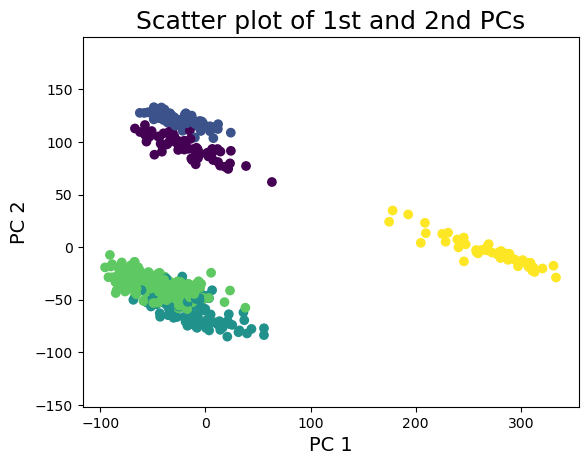

In [5]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X1)
# With labels
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("Scatter plot of 1st and 2nd PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()
perct_variance =pca.explained_variance_ratio_

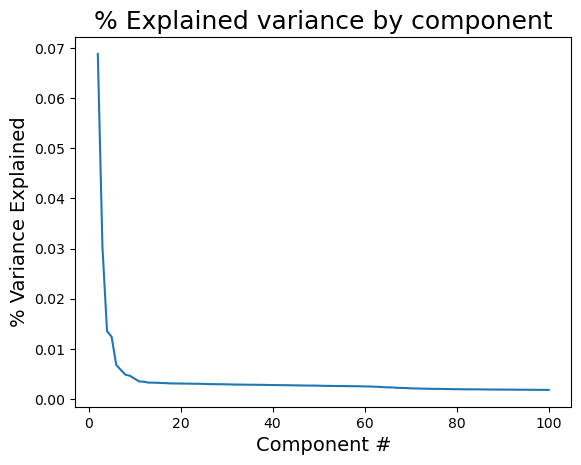

In [6]:
plt.plot(np.arange(2,101),perct_variance[1:100])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()
# print(pca.explained_variance_ratio_)

In [7]:
n = 6
print(perct_variance[0:n+20])
np.sum(perct_variance[0:n])

[0.13887565 0.06882332 0.03042886 0.01353755 0.01241041 0.0068265
 0.00579699 0.00485573 0.00462978 0.00405961 0.00350371 0.00345371
 0.0032804  0.00326608 0.00323887 0.00318921 0.00316092 0.00311762
 0.00309984 0.00309466 0.00307812 0.00306924 0.00304944 0.00304469
 0.00301652 0.00298546]


0.27090228496024404

Percentage variance explained log-transformed:

In [8]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X1)
perct_variance =pca.explained_variance_ratio_
np.sum(perct_variance[0:6])

0.27090228496024404

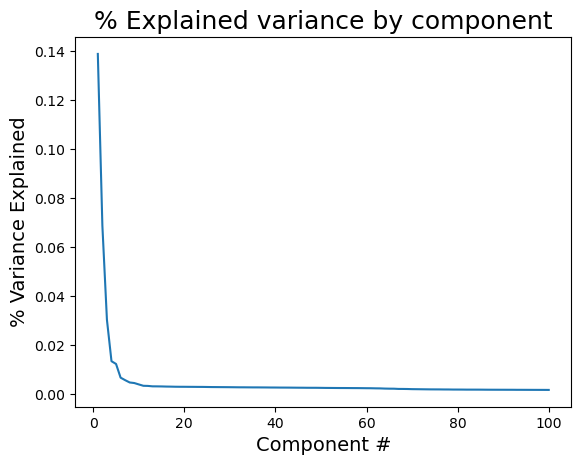

In [9]:
plt.plot(np.arange(1,101),perct_variance[0:100])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

How many PC's are needed to explain 85% of the variance for both raw and processed data? To get a better idea of how the explained variance grow as more PCs are included, plot the cumulative explained variance versus number of PCs.

Number of PCs needed for raw data

(511,) (511,)


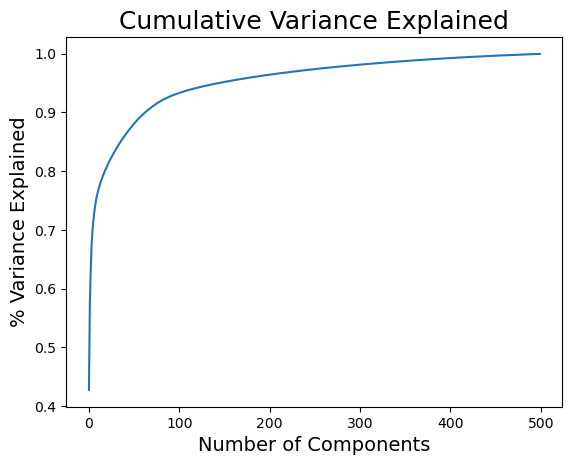

In [10]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X)
perct_variance =pca.explained_variance_ratio_
cum_var = np.cumsum(perct_variance)
print(perct_variance.shape, cum_var.shape)
plt.plot(np.arange(0,500),cum_var[:500])
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [11]:
np.where(cum_var >=.85)[0][0]

35

 Make a scatterplot with the first and second coordinates of the data as the axes.

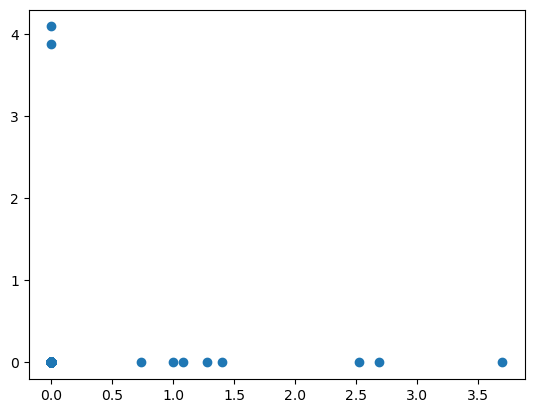

In [12]:

# Scatter plot between first two coordinates
plt.scatter(X1[:,0],X1[:,1])
plt.show()

Now find the top two principal components, and make a scatterplot of the projections of the data onto these two PC's.

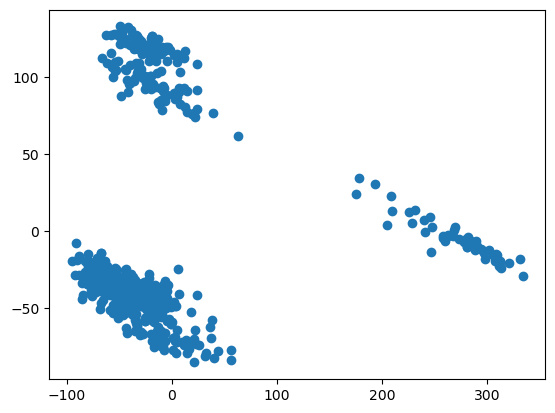

In [13]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X1)
perct_variance =pca.explained_variance_ratio_
cum_var = np.cumsum(perct_variance)
plt.scatter(z[:,0],z[:,1])
plt.show()

# MDS

MDS is a method that tries to produce a two dimensional visualization and the way it does that is to try to mimic the pairwise distances in the original data.

MDS can be slow when n is large

Use the sklearn implementation of MDS to visualize the data in two dimensions.

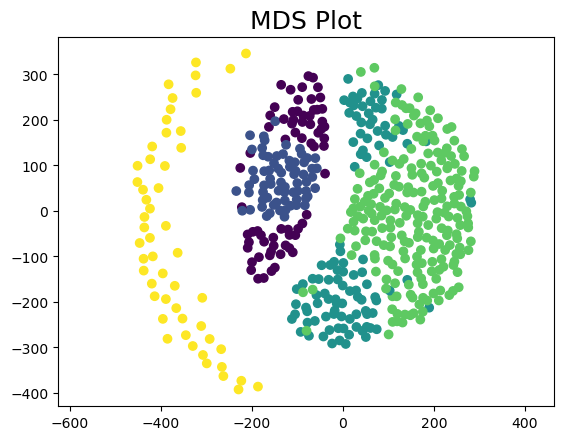

In [14]:
mds = MDS(n_components=2,verbose=0,eps=1e-8)
mds.fit(X1)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1], c=y)
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

## T-SNE

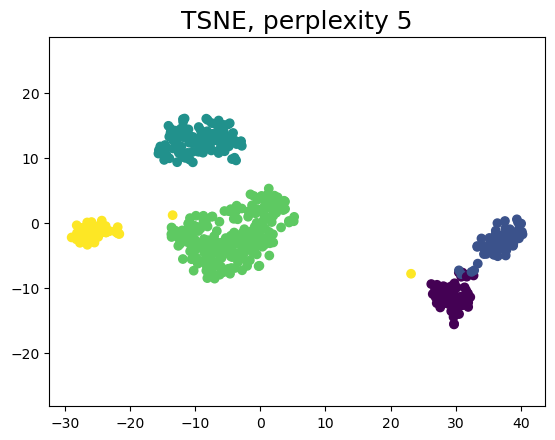

In [15]:
tsne = TSNE(n_components=2,verbose=0,perplexity=40)
z_tsne = tsne.fit_transform(X)
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
plt.title("TSNE, perplexity 5",size=18)
plt.axis("equal")
plt.show()

Project the data onto the top 50  PC's and run T-SNE with a perplexity value of 40 on the projected data to visualize the data in two dimensions

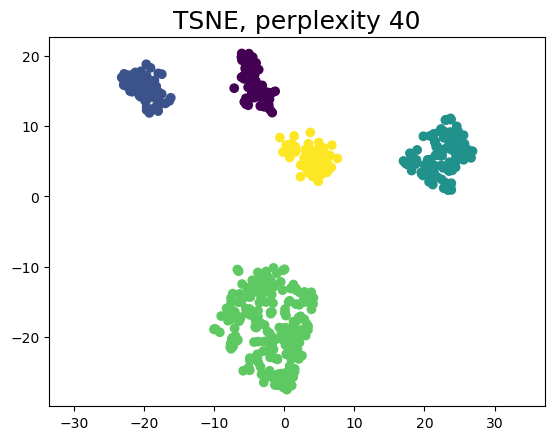

In [16]:
from sklearn.manifold import TSNE

pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X1)
tsne = TSNE(n_components=2,verbose=0,perplexity=40)
z_tsne = tsne.fit_transform(z[:,0:50])
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

# K-means

K-means algorithm is trying to minimize the sum of squared distance from each point to its assigned center.  It is trying to solve a problem that can have local minima.

So there are different parameters for this optimization. 

- Number of initializations (n_init):  default is 10. 

From here on we continue to use the log-transformed data projected onto the top 50 PC's

In [17]:
kmeans = KMeans(n_clusters=3,n_init=35)

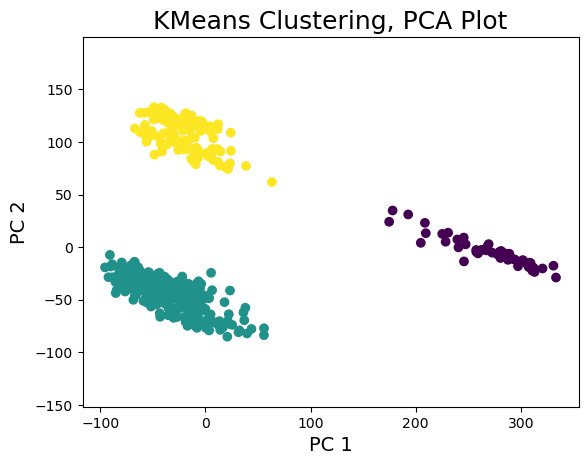

In [18]:
# kmean for PCA 
y = kmeans.fit_predict(z[:,0:50])
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

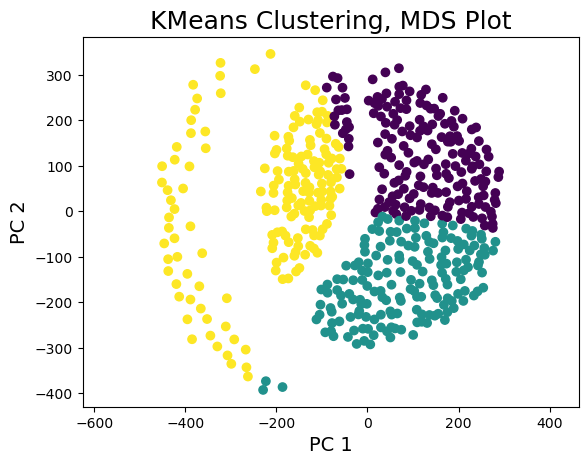

In [19]:
# Kmean with MDS
y = kmeans.fit_predict(mds.embedding_)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=y)
plt.title("KMeans Clustering, MDS Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

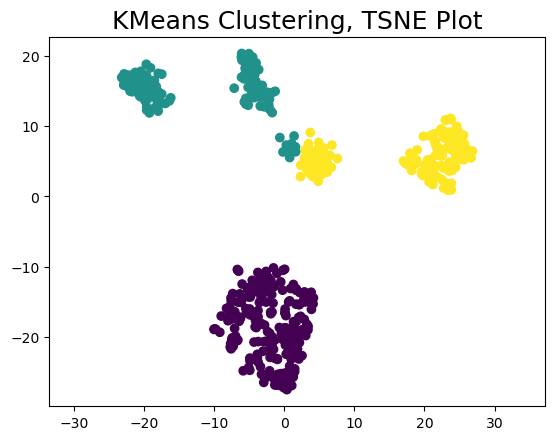

In [20]:
# Kmeans with TSNE
y = kmeans.fit_predict(z_tsne)
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
plt.title("KMeans Clustering, TSNE Plot",size=18)
plt.axis("equal")
plt.show()

Sum of squares criterion is called "inertia" in sklearn. 

We can use elbow plot for that:

use inertia to calculate k mean

Use the elbow method to select a number of clusters.

13826868.67691801
9520809.578745991
7257882.201193226
6202929.8418994695
5801585.180913828
5560910.683964471
5360718.9358057575
5238365.870156707
5151133.451466361
5046562.854665971


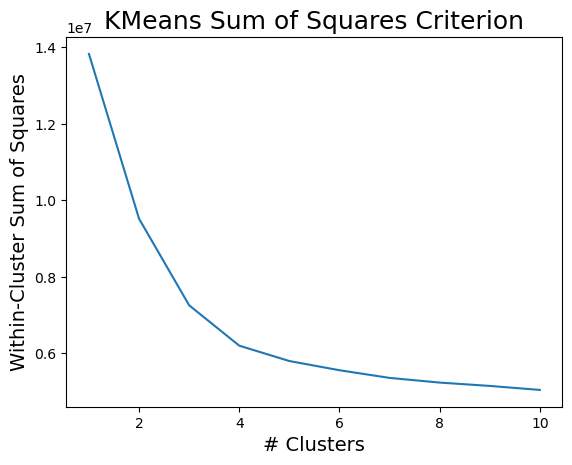

In [21]:
n = 10
all_kmeans = [KMeans(n_clusters=i+1,n_init=200, verbose=0) for i in range(n)]
# i-th kmeans fits i+1 clusters
for i in range(n):
    all_kmeans[i].fit(z[:,0:50])
    print(all_kmeans[i].inertia_) # wgss = kmean.inertia_

inertias = [all_kmeans[i].inertia_ for i in range(n)]
plt.plot(np.arange(1,n+1),inertias)
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares",size=14)
plt.show()

From the above graph, we can assume the cluster to be 3 or 4. Hence the cluster is subjective.  For the above graph since the inertia value stabilizes after 4th inertia, we can consider 4 cluster as good paramenter.

Another way to calculate the cluster is using silhoute score.  But Silhoutees seems less reliable in high-dimensional data.

Silhoutees is not supported by sklearn. There is a package called yellow brick

### 11. Visualizing cluster means

"perplexity = 40" is used in all T-SNE throughout this problem.

Compute the mean value of the data points in each cluster that you found using K-means. For this computation of mean, use the data in full original dimensions instead of the PCA projections (so if the data matrix is  **n X d** and you found **k** clusters, your cluster means should be **k** vectors in **d**  dimensions.)

Visualize the **k** cluster means in 2-dimensional space using MDS and PCA. Which of the following best explains the difference between these two plots and the T-SNE plot? (Choose all that apply.)

- The MDS and PCA plots confirm there are 3 groups of clusters, one group with 1 cluster mean and two groups with 2 cluster means each.
- The T-SNE plots confirm there are 3 groups of clusters, one group with 1 cluster mean and two groups with 2 cluster means each.
- The PCA and MDS plots show relatively accurate representation of distances, with one cluster means far away from the others, indicating a different type of cell.
- The T-SNE plots show relatively accurate representation of distances, with one cluster means far away from the others, indicating a different type of cell.
- The PCA and MDS plots do not show any grouping of the cluster means, and place them at similar distances apart
- The T-SNE does not show any grouping of the cluster means, and place them at similar distances apart


In [22]:
X1.shape

(511, 45768)

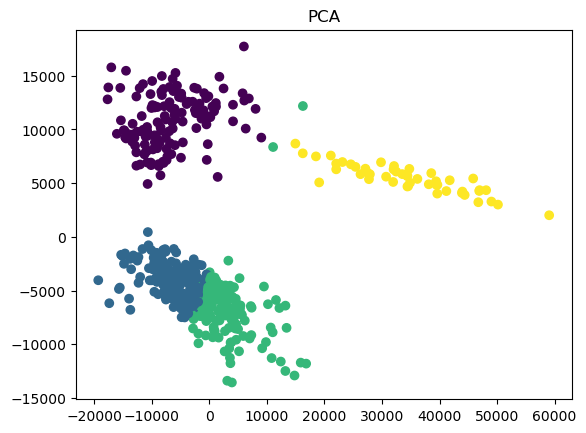

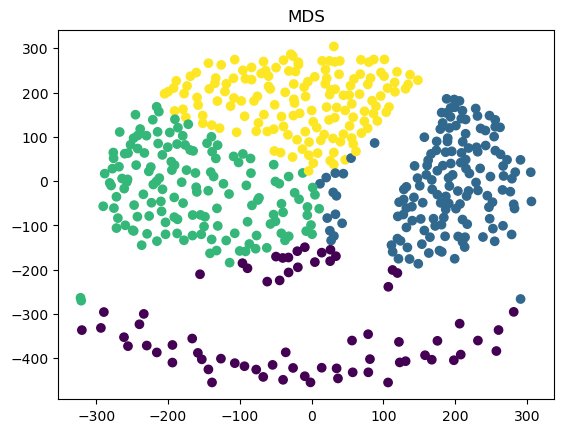

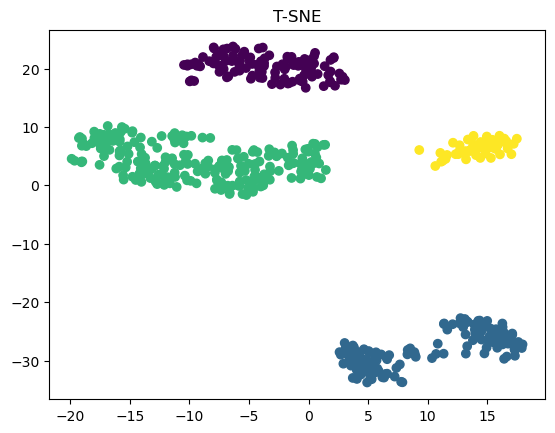

In [59]:

kmeans = KMeans(n_clusters=4, verbose=0, random_state=0)
pca = PCA()
z = pca.fit_transform(X)

kmeans.fit(z)
plt.scatter(z[:,0],z[:,1],c=kmeans.labels_)
plt.title('PCA')
plt.show()

mds = MDS(n_components=2)
mds.fit(X1)
kmeans.fit(mds.embedding_)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=kmeans.labels_ )
plt.title('MDS')
plt.show()


tsne = TSNE(n_components=2,verbose=0,perplexity=40)
z_tsne = tsne.fit_transform(z[:,0:50])
kmeans.fit(z_tsne)
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=kmeans.labels_)
plt.title('T-SNE')
plt.show()

6


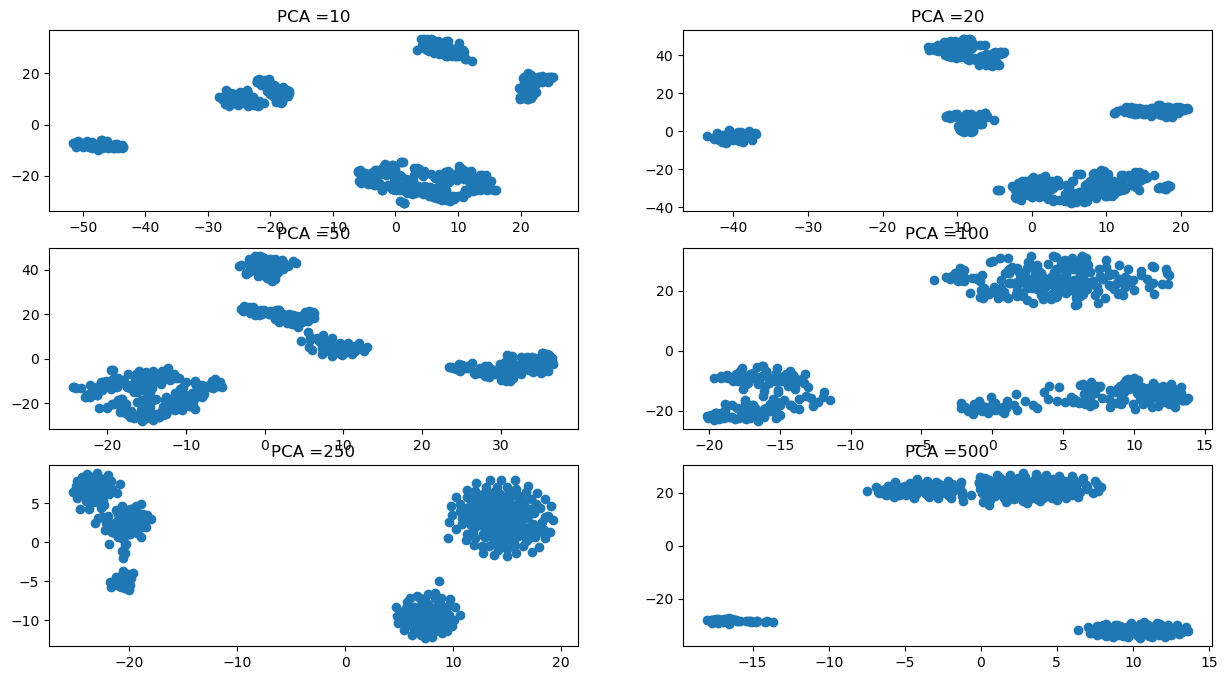

In [5]:
import time

PCS = [10,20,50,100,250,500]

Transformed_top_pca = TSNE()
(fig, subplots) = plt.subplots(3, 2, figsize=(15, 8))

subplots = subplots.flatten()
print(len(subplots))
# skipping 1st and last column we want to plot the histogram for binary features

for idx, _c in enumerate(PCS):
    pca = PCA(n_components=_c)
    pca_trs = pca.fit_transform(X1)
    ax = subplots[idx]
    t0 = time.time()
    tsne_top_pca = Transformed_top_pca.fit_transform(pca_trs[:,:_c])
    t1 = time.time()
    ax.set_title("PCA =%d" % _c)
    ax.scatter(tsne_top_pca[:,0], tsne_top_pca[:,1])
    ax.axis('tight')
    
plt.show()

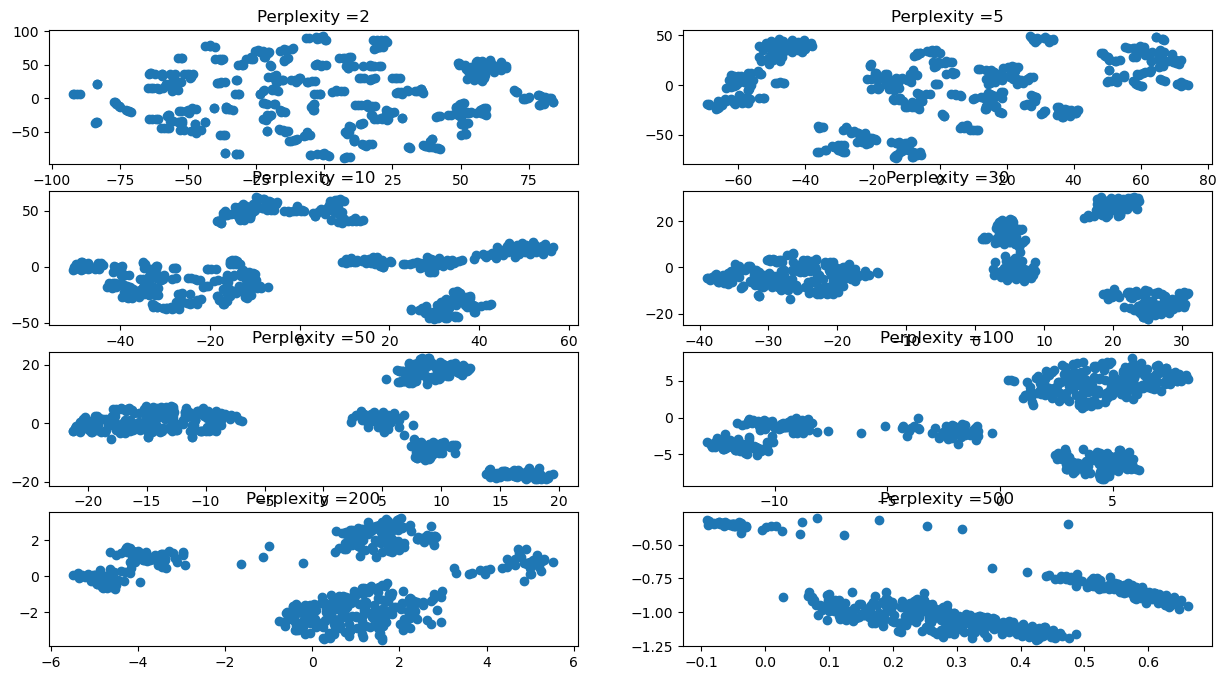

In [6]:
pca = PCA(n_components=50)
trn_pca = pca.fit_transform(X1)
perplexities = [2,5,10,30, 50, 100, 200,500]

(fig, subplots) = plt.subplots(4, 2, figsize=(15, 8))

subplots = subplots.flatten()
for idx, _c in enumerate(perplexities):
    
    top50_pca = TSNE(perplexity=_c)
    ax = subplots[idx]
    t0 = time.time()
    tsnepcatoppcs = top50_pca.fit_transform(trn_pca)
    t1 = time.time()
    ax.set_title("Perplexity =%d" % _c)
    ax.scatter(tsnepcatoppcs[:,0], tsnepcatoppcs[:,1])
    ax.axis('tight')
    
plt.show()

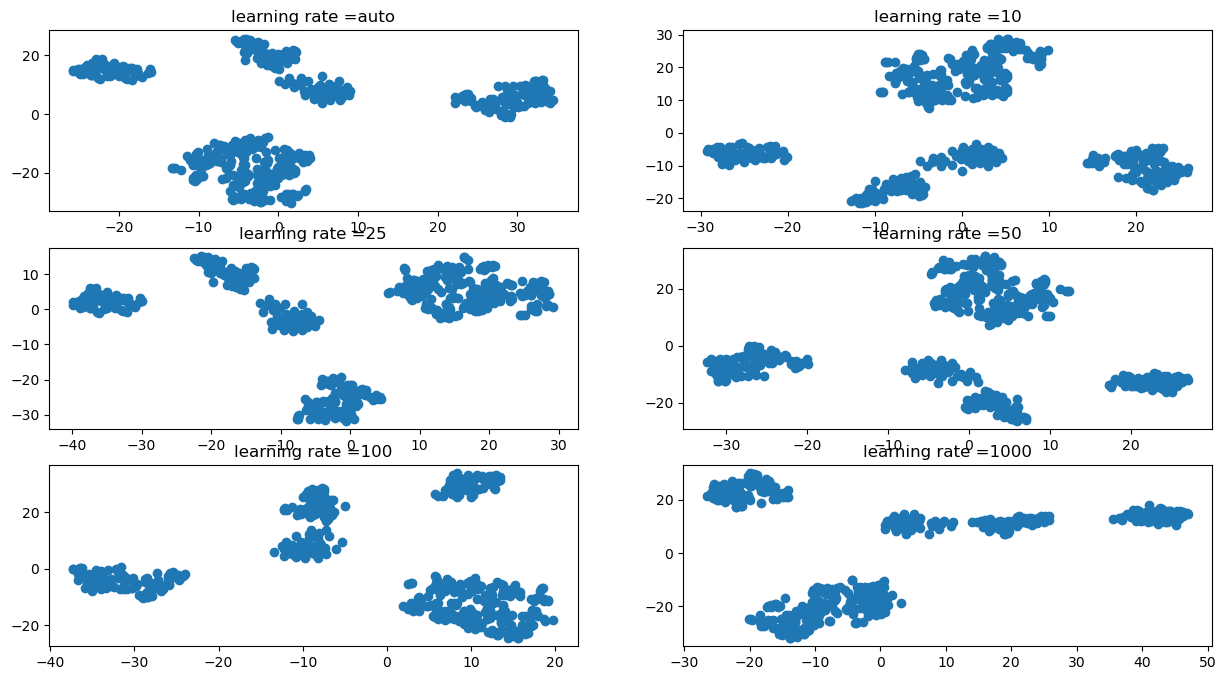

In [12]:
pca = PCA(n_components=50)
trn_pca = pca.fit_transform(X1)
learning_rate = ['auto',10,25,50,100,1000]

(fig, subplots) = plt.subplots(3, 2, figsize=(15, 8))

subplots = subplots.flatten()
for idx, _c in enumerate(learning_rate):
    
    top50_pca = TSNE(learning_rate=_c, perplexity=30)
    ax = subplots[idx]
    t0 = time.time()
    tsne_top_pcs = top50_pca.fit_transform(trn_pca)
    t1 = time.time()
    ax.set_title("learning rate ={}".format(_c))
    ax.scatter(tsne_top_pcs[:,0], tsne_top_pcs[:,1])
    ax.axis('tight')
    
plt.show()

8


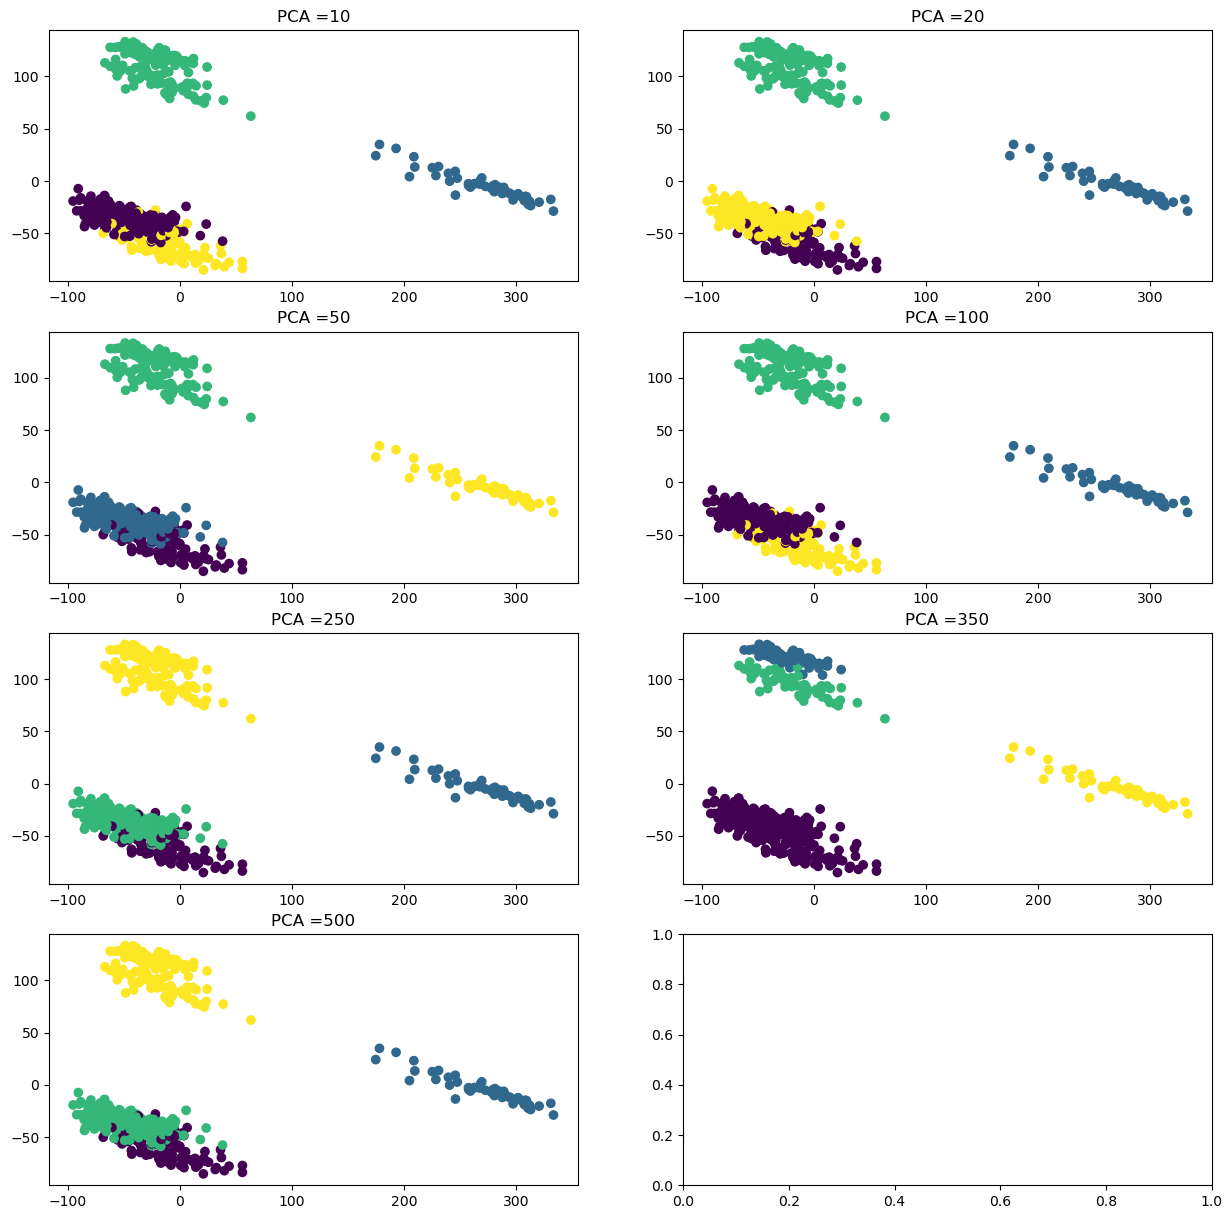

In [10]:
PCS = [10,20,50,100,250,350,500]

top_pca = TSNE()
(fig, subplots) = plt.subplots(4, 2, figsize=(15, 15))

subplots = subplots.flatten()
print(len(subplots))

for idx, _c in enumerate(PCS):
    pca = PCA(n_components=_c)
    trsn_pca = pca.fit_transform(X1)
    ax = subplots[idx]
    t0 = time.time()
    kmeans = KMeans(n_clusters=4, random_state=0).fit(trsn_pca)
    t1 = time.time()
    ax.set_title("PCA =%d" % _c)
    ax.scatter(trsn_pca[:,0], trsn_pca[:,1],  c=kmeans.labels_)
    ax.axis('tight')
    
plt.show()